In [51]:
from diagrams import Diagram, Cluster, Edge
from diagrams.programming.flowchart import Document, MultipleDocuments

with Diagram("Company Detective", show=False, filename="system_diagram"):
    source = Document("Company, product name")

    with Cluster("Reddit"):

        markdowns = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="PRAW") >> MultipleDocuments("Threads") >> MultipleDocuments("Markdowns")

        with Cluster("Langchain map-reduce"):
            reddit_summary = markdowns >> Edge(label="Extract quotes, gpt4o-mini") >> MultipleDocuments("Quotes by document") >> Edge(label="Organize, gpt4o-mini") >> Document("Quotes by topic")



    with Cluster("Glassdoor"):
        glassdoor_summary = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly") >> MultipleDocuments("Employee review data") >> MultipleDocuments("Markdowns") >> Edge(label="gpt4o-mini") >> Document("Key quotes")

    with Cluster("News"):
        news_summary = source >> Edge(label="Google search") >> MultipleDocuments("URLs") >> Edge(label="newspaper4k") >> MultipleDocuments("Article texts") >> MultipleDocuments("Markdowns") >> Edge(label="gpt4o-mini") >> Document("Abstractive summary")
    
    with Cluster("Crunchbase"):
        crunchbase_markdown = source >> Edge(label="Google search") >> Document("URL") >> Edge(label="Scrapfly") >> Document("Data") >> Document("Markdown")

    summary = Document("Summary")

    reddit_summary >> summary
    glassdoor_summary >> summary
    news_summary >> summary
    crunchbase_markdown >> summary

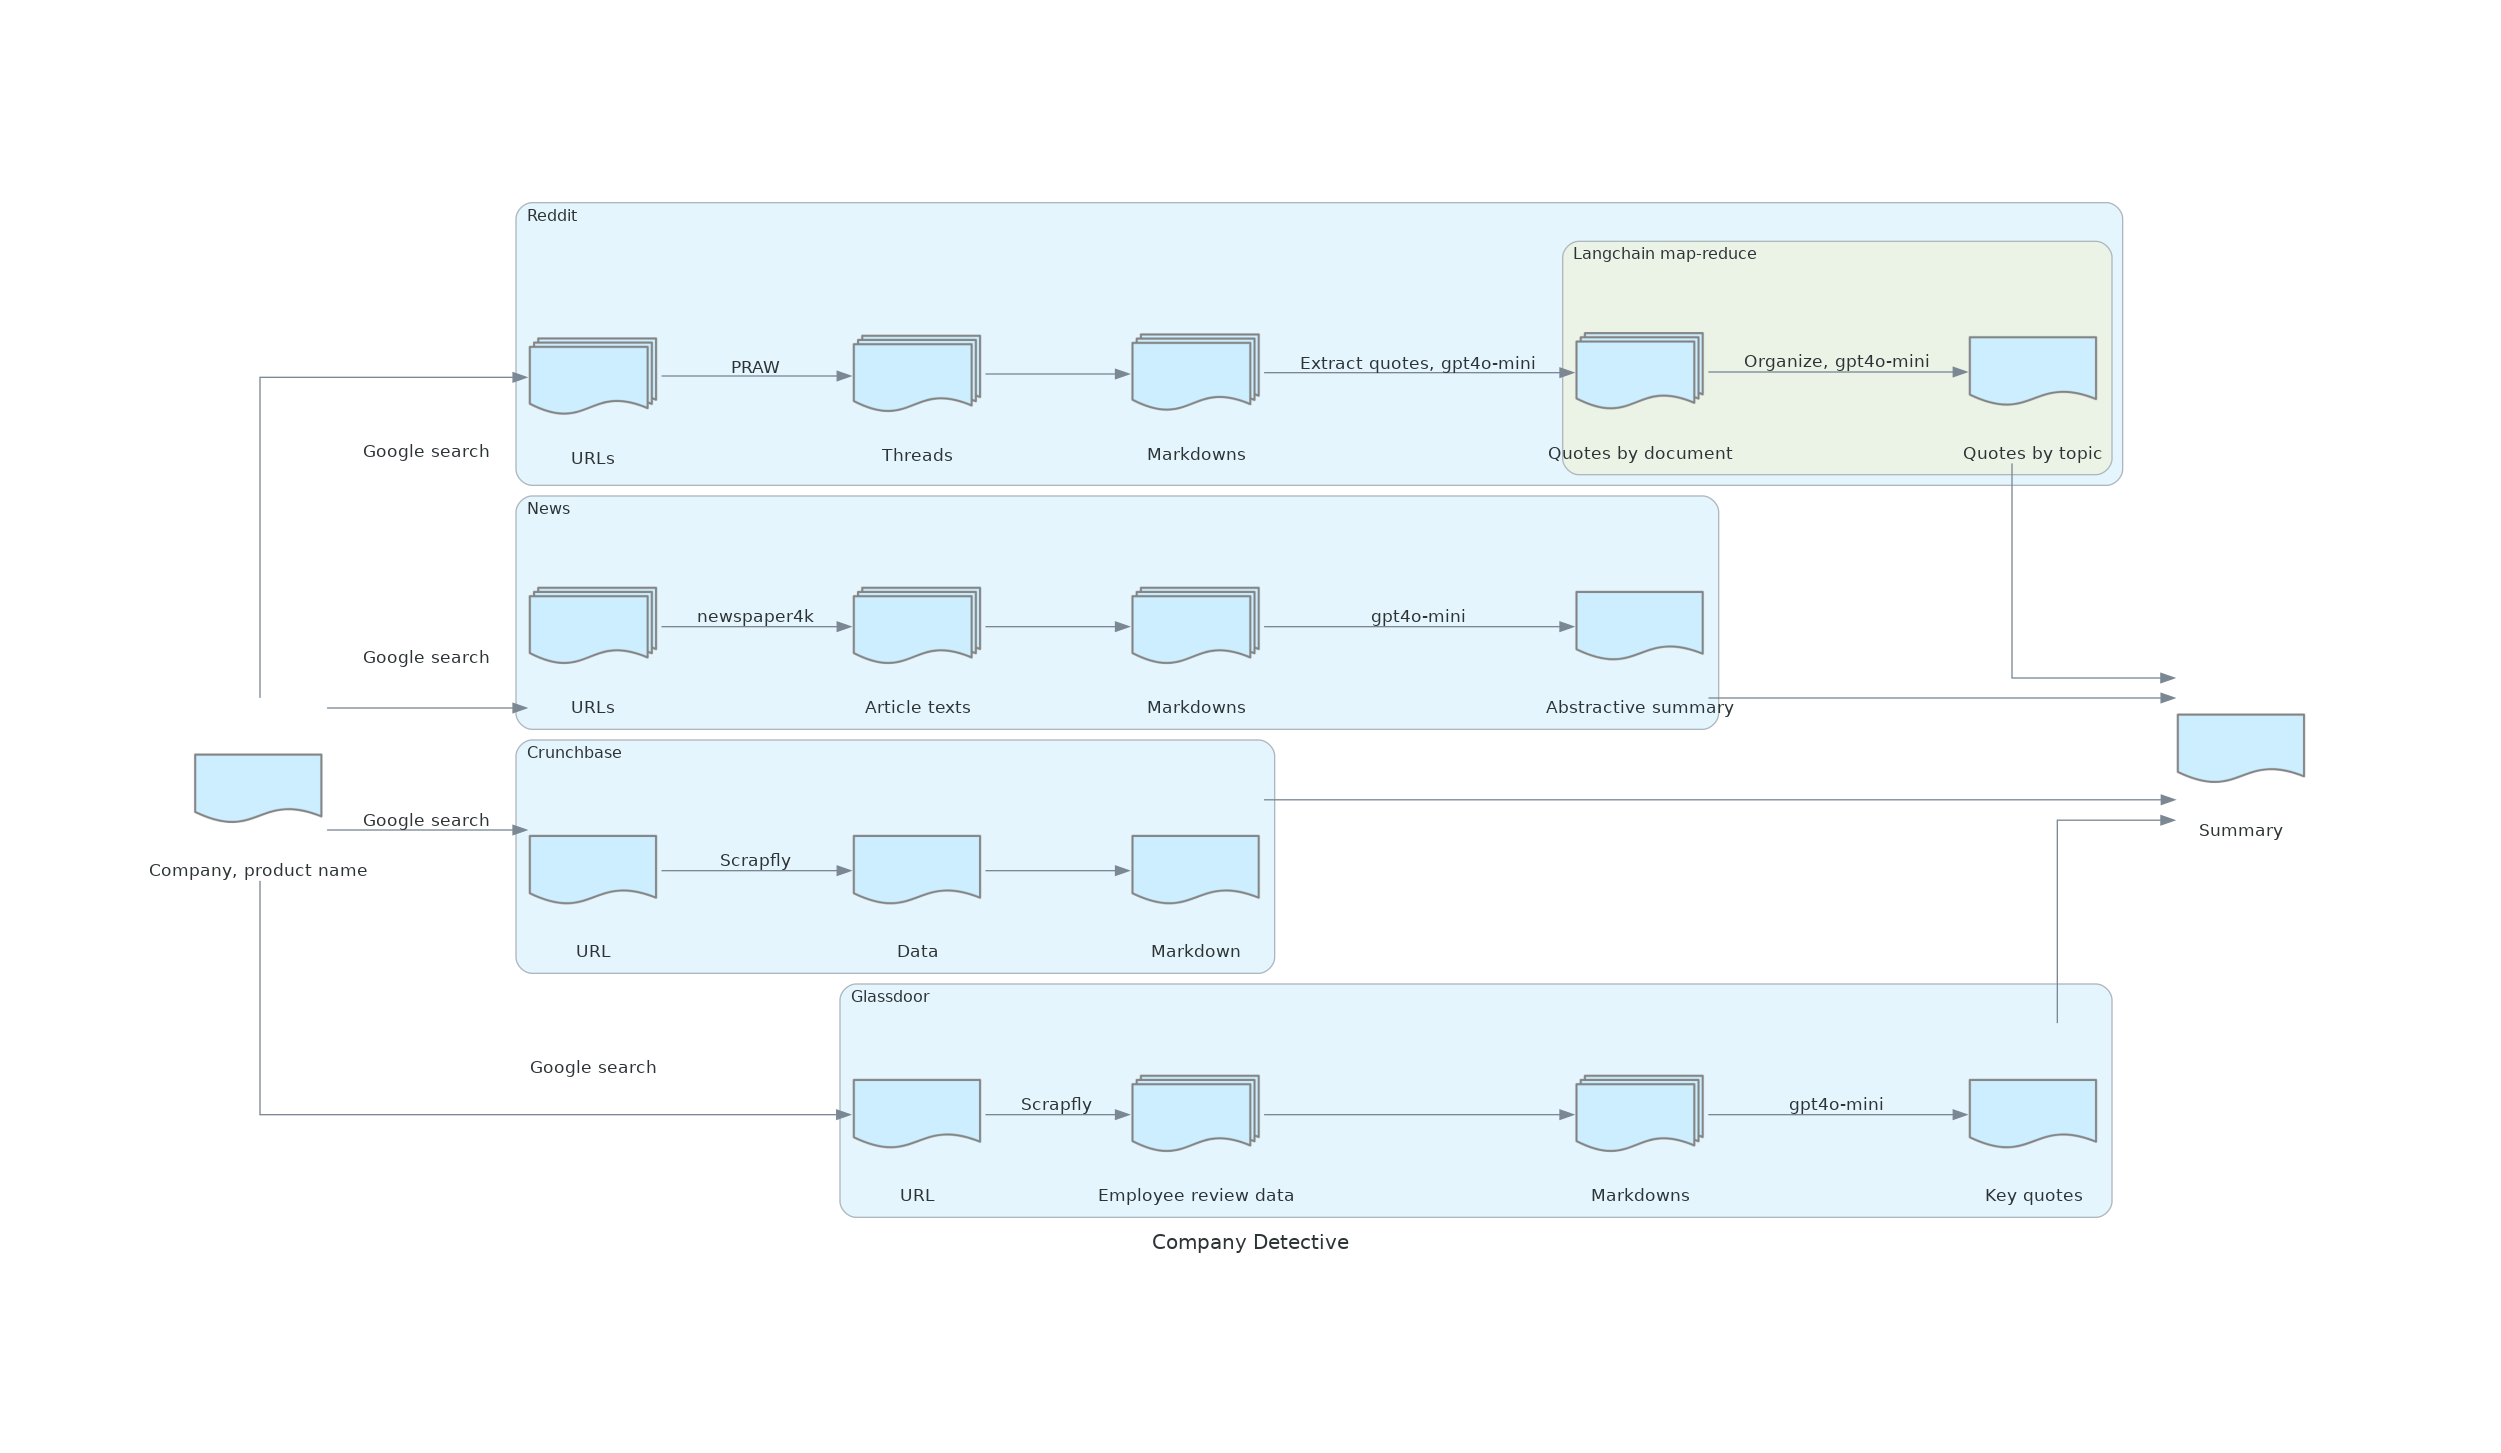

In [52]:
from IPython.display import Image
Image(filename="system_diagram.png") 